In [1]:
import h5py
import numpy as np
import matplotlib
import sys
#matplotlib.use('Agg')
matplotlib.rcParams['mathtext.default'] = 'regular'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from PIL import Image
from numpy import inf
import numpy.ma as ma
from numpy import *

/Users/litadlc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Loading save number density files (n(v) at different j,k values)
n_v_SiII=np.load('n_v_SiII.npy')
n_v_SiIV=np.load('n_v_SiIV.npy')
n_v_OI=np.load('n_v_OI.npy')
n_v_OVI=np.load('n_v_OVI.npy')
n_v_CII=np.load('n_v_CII.npy')
n_v_CIV=np.load('n_v_CIV.npy')
n_v_SII=np.load('n_v_SII.npy')
n_v_NV=np.load('n_v_NV.npy')


istart = 398 # starting file number
iend   = 398 # ending file number

dnameout='/Users/litadlc/Desktop/10tcc/'

for i in range(istart,iend+1,30):
    print(i)

398


In [3]:
#Constant that are needed to calculate Tau(v)
me=9.10e-28 #mass of electron in grams
c=3e18 #speed of light in Angstroms per sec
dv=1.2e6  #in cm length of velocity 
dr=4.94e20 #length of box in cm length along the x-axis
e = 4.80e-10 #in esu=((cm^3/2)*(grams^1/2))/s
#oscillator strength 
f_s_SiII=1.18
f_w_SiII=0.582
f_s_SiIV=0.524
f_w_SiIV=0.26
f_s_OVI=0.1325
f_w_OVI=0.0658
f_s_CII=0.336
f_w_CII=0.168
f_s_CIV=0.190
f_w_CIV=0.0952
f_s_NV=0.156
f_w_NV=0.0777

#rest wave-length
rw_s_SiII=1260 # in Angstroms
rw_w_SiII=1193
rw_s_SiIV=1394 # in Angstroms
rw_w_SiIV=1403
rw_s_OVI=1032 #in Angstroms
rw_w_OVI=1038
rw_CII=904 #in Angstroms(similar value for both strong + week line)
rw_s_CIV=1548 #in Angstroms
rw_w_CIV=1551 #in Angstroms
rw_s_NV=1239 #in Angstroms
rw_w_NV=1243 #in Angstroms

In [4]:
dx = 2.411e17# size scale, in cm, 5/64 pc
T_jkw_SiII= ((((np.pi)*(e**2))/(me*c))*f_w_SiII*n_v_SiII*rw_w_SiII*(dx/dv))
T_jkw_SiIV= ((((np.pi)*(e**2))/(me*c))*f_w_SiIV*n_v_SiIV*rw_w_SiIV*(dx/dv))
T_jkw_OVI = ((((np.pi)*(e**2))/(me*c))*f_w_OVI*n_v_OVI*rw_w_OVI*(dx/dv))
T_jkw_CII= ((((np.pi)*(e**2))/(me*c))*f_w_CII*n_v_CII*rw_CII*(dx/dv))
T_jkw_CIV= ((((np.pi)*(e**2))/(me*c))*f_w_CIV*n_v_CIV*rw_w_CIV*(dx/dv))
T_jkw_NV= ((((np.pi)*(e**2))/(me*c))*f_w_NV*n_v_NV*rw_w_NV*(dx/dv))

In [5]:
np.save('T_jkw_SiII',T_jkw_SiII)
np.save('T_jkw_SiIV',T_jkw_SiIV)
np.save('T_jkw_OVI',T_jkw_OVI)
np.save('T_jkw_CII',T_jkw_CII)
np.save('T_jkw_CIV',T_jkw_CIV)
np.save('T_jkw_NV',T_jkw_NV)

In [6]:
T_jks_SiII= ((((np.pi)*(e**2))/(me*c))*f_s_SiII*n_v_SiII*rw_s_SiII*(dx/dv))
T_jks_SiIV= ((((np.pi)*(e**2))/(me*c))*f_s_SiIV*n_v_SiIV*rw_s_SiIV*(dx/dv))
T_jks_OVI= ((((np.pi)*(e**2))/(me*c))*f_s_OVI*n_v_OVI*rw_s_OVI*(dx/dv))
T_jks_CII= ((((np.pi)*(e**2))/(me*c))*f_s_CII*n_v_CII*rw_CII*(dx/dv))
T_jks_CIV= ((((np.pi)*(e**2))/(me*c))*f_s_CIV*n_v_CIV*rw_s_CIV*(dx/dv))
T_jks_NV= ((((np.pi)*(e**2))/(me*c))*f_s_NV*n_v_NV*rw_s_NV*(dx/dv))


f_s_absorbed_SiII_dx=np.exp(-T_jks_SiII)
f_w_absorbed_SiII_dx=np.exp(-T_jkw_SiII)
f_s_absorbed_SiIV_dx=np.exp(-T_jks_SiIV)
f_w_absorbed_SiIV_dx=np.exp(-T_jkw_SiIV)
f_s_absorbed_OVI_dx=np.exp(-T_jks_OVI)
f_w_absorbed_OVI_dx=np.exp(-T_jkw_OVI)
f_s_absorbed_CII_dx=np.exp(-T_jks_CII)
f_w_absorbed_CII_dx=np.exp(-T_jkw_CII)
f_s_absorbed_CIV_dx=np.exp(-T_jks_CIV)
f_w_absorbed_CIV_dx=np.exp(-T_jkw_CIV)
f_s_absorbed_NV_dx=np.exp(-T_jks_NV)
f_w_absorbed_NV_dx=np.exp(-T_jkw_NV)

avgf_s_absorbed_SiII_dx=f_s_absorbed_SiII_dx.mean(axis=(0,1))
avgf_w_absorbed_SiII_dx=f_w_absorbed_SiII_dx.mean(axis=(0,1))
avgf_s_absorbed_SiIV_dx=f_s_absorbed_SiIV_dx.mean(axis=(0,1))
avgf_w_absorbed_SiIV_dx=f_w_absorbed_SiIV_dx.mean(axis=(0,1))
avgf_s_absorbed_OVI_dx=f_s_absorbed_OVI_dx.mean(axis=(0,1))
avgf_w_absorbed_OVI_dx=f_w_absorbed_OVI_dx.mean(axis=(0,1))
avgf_s_absorbed_CII_dx=f_s_absorbed_CII_dx.mean(axis=(0,1))
avgf_w_absorbed_CII_dx=f_w_absorbed_CII_dx.mean(axis=(0,1))
avgf_s_absorbed_CIV_dx=f_s_absorbed_CIV_dx.mean(axis=(0,1))
avgf_w_absorbed_CIV_dx=f_w_absorbed_CIV_dx.mean(axis=(0,1))
avgf_s_absorbed_NV_dx=f_s_absorbed_NV_dx.mean(axis=(0,1))
avgf_w_absorbed_NV_dx=f_w_absorbed_NV_dx.mean(axis=(0,1))

In [7]:
np.save('T_jks_SiII',T_jks_SiII)
np.save('T_jks_SiIV',T_jks_SiIV)
np.save('T_jks_OVI',T_jks_OVI)
np.save('T_jks_CII',T_jks_CII)
np.save('T_jks_CIV',T_jks_CIV)
np.save('T_jks_NV',T_jks_NV)

In [8]:
np.save('avgf_s_absorbed_SiII_dx',avgf_s_absorbed_SiII_dx)
np.save('avgf_w_absorbed_SiII_dx',avgf_w_absorbed_SiII_dx)

np.save('avgf_s_absorbed_SiIV_dx',avgf_s_absorbed_SiIV_dx)
np.save('avgf_w_absorbed_SiIV_dx',avgf_w_absorbed_SiIV_dx)

np.save('avgf_s_absorbed_OVI_dx',avgf_s_absorbed_OVI_dx)
np.save('avgf_w_absorbed_OVI_dx',avgf_w_absorbed_OVI_dx)

np.save('avgf_s_absorbed_CII_dx',avgf_s_absorbed_CII_dx)
np.save('avgf_w_absorbed_CII_dx',avgf_w_absorbed_CII_dx)

np.save('avgf_s_absorbed_CIV_dx',avgf_s_absorbed_CIV_dx)
np.save('avgf_w_absorbed_CIV_dx',avgf_w_absorbed_CIV_dx)

np.save('avgf_s_absorbed_NV_dx',avgf_s_absorbed_NV_dx)
np.save('avgf_w_absorbed_NV_dx',avgf_w_absorbed_NV_dx)

<Figure size 720x648 with 0 Axes>

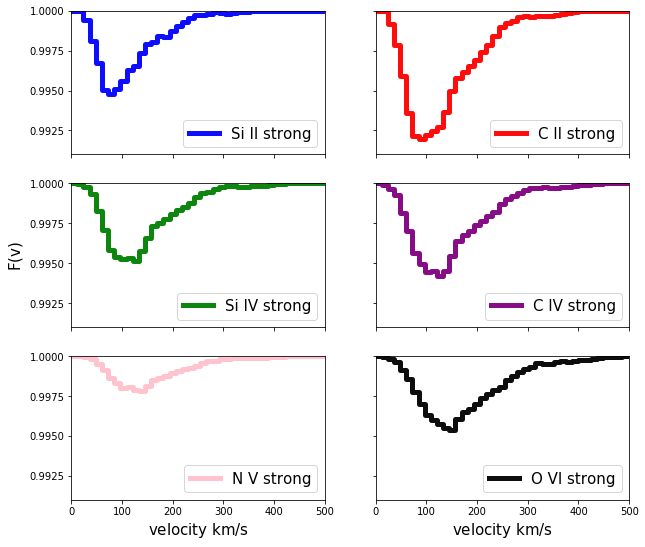

In [9]:
fig = plt.figure(figsize=(10,9))
velocity=np.linspace(0,1200,100)
f, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(10,9))
#ax1.plot(velocity, avgf_w_absorbed_SiII_dx, '--',drawstyle='steps', alpha=0.50,linewidth=3.0, color='blue',label ='Si II weak')
ax1.plot(velocity, avgf_s_absorbed_SiII_dx,drawstyle='steps', alpha=0.95,linewidth=5.0, color='blue',label ='Si II strong')
#ax2.plot(velocity, avgf_w_absorbed_CII_dx, '--', drawstyle='steps', alpha=0.50,linewidth=3.0, color='red',label ='C II weak')
ax2.plot(velocity, avgf_s_absorbed_CII_dx, drawstyle='steps', alpha=0.95,linewidth=5.0, color='red',label ='C II strong')
#ax3.plot(velocity, avgf_w_absorbed_SiIV_dx, '--',drawstyle='steps', alpha=0.50,linewidth=3.0, color='green',label ='Si IV weak')
ax3.plot(velocity, avgf_s_absorbed_SiIV_dx,drawstyle='steps', alpha=0.95,linewidth=5.0, color='green',label ='Si IV strong')
#ax4.plot(velocity, avgf_w_absorbed_CIV_dx, '--', drawstyle='steps', alpha=0.50,linewidth=3.0, color='purple',label ='C IV weak')
ax4.plot(velocity, avgf_s_absorbed_CIV_dx, drawstyle='steps', alpha=0.95,linewidth=5.0, color='purple',label ='C IV strong')
#ax5.plot(velocity, avgf_w_absorbed_NV_dx, '--', drawstyle='steps', alpha=0.50,linewidth=3.0, color='pink',label ='N V weak')
ax5.plot(velocity, avgf_s_absorbed_NV_dx,drawstyle='steps', alpha=0.95,linewidth=5.0, color='pink',label ='N V strong')
#ax6.plot(velocity, avgf_w_absorbed_OVI_dx, '--', drawstyle='steps', alpha=0.50,linewidth=3.0, color='black',label ='O VI weak')
ax6.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.95,linewidth=5.0, color='black',label ='O VI strong')

ax1.set_ylim(0.991,1,0.001)
ax2.set_ylim(0.991,1,0.001)
ax3.set_ylim(0.991,1,0.001)
ax4.set_ylim(0.991,1,0.001)
ax5.set_ylim(0.991,1,0.001)
ax6.set_ylim(0.991,1,0.001)

ax1.legend(loc='lower right',fontsize=15)
ax2.legend(loc='lower right',fontsize=15)
ax3.legend(loc='lower right',fontsize=15)
ax4.legend(loc='lower right',fontsize=15)
ax5.legend(loc='lower right',fontsize=15)
ax6.legend(loc='lower right',fontsize=15)
ax5.set_xlabel('velocity $km/s$',fontsize=15)
ax6.set_xlabel('velocity $km/s$',fontsize=15)
ax3.set_ylabel(r'$F(v)$',fontsize=15)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
ax5.set_xlim(0,500,100)
ax6.set_xlim(0,500,100)
#plt.savefig(dnameout+'NormalizedFlux_StrongLines_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

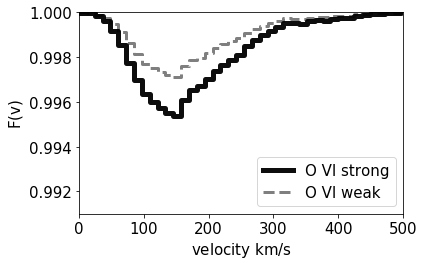

In [10]:
fig = plt.figure(figsize=(6,3.5))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.75,0.8])
ax.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.95,linewidth=5.0, color='black',label ='O VI strong')
ax.plot(velocity, avgf_w_absorbed_OVI_dx, '--', drawstyle='steps', alpha=0.50,linewidth=3.0, color='black',label ='O VI weak')
ax.set_ylim(0.991,1,0.001)
ax.set_xlim(0,500,300)
ax.legend(loc='lower right',fontsize=15)
ax.set_xlabel('velocity $km/s$',fontsize=15)
ax.set_ylabel(r'$F(v)$',fontsize=15)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
#plt.savefig(dnameout+'Flux_OVIDoublet_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [11]:
Tau_0_OVI_dx=np.log(1-avgf_w_absorbed_OVI_dx)-np.log(avgf_w_absorbed_OVI_dx-avgf_s_absorbed_OVI_dx)
Tau_0_SiII_dx=np.log(1-avgf_w_absorbed_SiII_dx)-np.log(avgf_w_absorbed_SiII_dx-avgf_s_absorbed_SiII_dx)
Tau_0_SiIV_dx=np.log(1-avgf_w_absorbed_SiIV_dx)-np.log(avgf_w_absorbed_SiIV_dx-avgf_s_absorbed_SiIV_dx)
Tau_0_CII_dx=np.log(1-avgf_w_absorbed_CII_dx)-np.log(avgf_w_absorbed_CII_dx-avgf_s_absorbed_CII_dx)
Tau_0_CIV_dx=np.log(1-avgf_w_absorbed_CIV_dx)-np.log(avgf_w_absorbed_CIV_dx-avgf_s_absorbed_CIV_dx)
Tau_0_NV_dx=np.log(1-avgf_w_absorbed_NV_dx)-np.log(avgf_w_absorbed_NV_dx-avgf_s_absorbed_NV_dx)

/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipyk

In [12]:
where_are_NaNs = isnan(Tau_0_OVI_dx)
where_are_NaNs1 = isnan(Tau_0_SiII_dx)
where_are_NaNs2 = isnan(Tau_0_SiIV_dx)
where_are_NaNs3 = isnan(Tau_0_CII_dx)
where_are_NaNs4 = isnan(Tau_0_CIV_dx)
where_are_NaNs5 = isnan(Tau_0_NV_dx)
Tau_0_OVI_dx[where_are_NaNs] = 0
Tau_0_SiII_dx[where_are_NaNs1] = 0
Tau_0_SiIV_dx[where_are_NaNs2] = 0
Tau_0_CII_dx[where_are_NaNs3] = 0
Tau_0_CIV_dx[where_are_NaNs4] = 0
Tau_0_NV_dx[where_are_NaNs5] = 0
Tau_0_OVI_dx[Tau_0_OVI_dx == inf] = 0
Tau_0_OVI_dx[Tau_0_OVI_dx < 0] = 0
Tau_0_SiIV_dx[Tau_0_SiIV_dx == inf] = 0
Tau_0_NV_dx[Tau_0_NV_dx == inf] = 0
Tau_0_SiIV_dx[Tau_0_SiIV_dx < 0] = 0
Tau_0_CII_dx[Tau_0_CII_dx < 0] = 0
Tau_0_CIV_dx[Tau_0_CIV_dx < 0] = 0
Tau_0_SiII_dx[Tau_0_SiII_dx < 0] = 0
Tau_0_NV_dx[Tau_0_NV_dx < 0] = 0

In [13]:
#Tau_0 plot with all ions

fig = plt.figure(figsize=(7,7))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.1,0.1,0.85,0.85])
plt.plot(velocity, Tau_0_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II T~$10^{3.8}-10^{4.3} K$')
plt.plot(velocity, Tau_0_CII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='red',label ='C II T~$10^{3.9}- 10^{4.9} K$')
plt.plot(velocity, Tau_0_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV T~$10^{4.6}-10^{5.2} K$')
plt.plot(velocity, Tau_0_CIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='purple',label ='C IV T~$10^{4.9}-10^{5.3} K$')
plt.plot(velocity, Tau_0_NV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='pink',label ='N V T~$10^{5.1}-10^{5.5} K$')
plt.plot(velocity, Tau_0_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI T~$10^{5.3}-10^{5.7} K$')
plt.legend(loc='center right',fontsize=12)
ax.set_xlabel('velocity $(km/s)$',fontsize=15)
ax.set_ylabel(r'$\tau_{0}$',fontsize=15)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15) 
ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'AllIons_Optdepth_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [14]:
T_jks_SiII[T_jks_SiII < 1e-6] = np.nan
T_jks_SiIV[T_jks_SiIV < 1e-6] = np.nan
T_jks_OVI[T_jks_OVI < 1e-6] = np.nan
T_jks_CII[T_jks_CII < 1e-6] = np.nan
T_jks_CIV[T_jks_CIV < 1e-6] = np.nan
T_jks_NV[T_jks_NV < 1e-6] = np.nan

median_T_jks_SiII = np.nanmedian(T_jks_SiII, axis=(0,1))
median_T_jks_SiIV = np.nanmedian(T_jks_SiIV, axis=(0,1))
median_T_jks_OVI = np.nanmedian(T_jks_OVI, axis=(0,1))
median_T_jks_CII = np.nanmedian(T_jks_CII, axis=(0,1))
median_T_jks_CIV = np.nanmedian(T_jks_CIV, axis=(0,1))
median_T_jks_NV = np.nanmedian(T_jks_NV, axis=(0,1))

/Users/litadlc/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [15]:
#Calculation for first quartile
FQ_T_jks_SiII=np.nanpercentile(T_jks_SiII, 25, axis=(0,1))
FQ_T_jks_SiIV=np.nanpercentile(T_jks_SiIV, 25, axis=(0,1))
FQ_T_jks_OVI=np.nanpercentile(T_jks_OVI, 25, axis=(0,1))
FQ_T_jks_CII=np.nanpercentile(T_jks_CII, 25, axis=(0,1))
FQ_T_jks_CIV=np.nanpercentile(T_jks_CIV, 25, axis=(0,1))
FQ_T_jks_NV=np.nanpercentile(T_jks_NV, 25, axis=(0,1))
#Calculation for third quartile
TQ_T_jks_SiII=np.nanpercentile(T_jks_SiII, 75, axis=(0,1))
TQ_T_jks_SiIV=np.nanpercentile(T_jks_SiIV, 75, axis=(0,1))
TQ_T_jks_OVI=np.nanpercentile(T_jks_OVI, 75, axis=(0,1))
TQ_T_jks_CII=np.nanpercentile(T_jks_CII, 75, axis=(0,1))
TQ_T_jks_CIV=np.nanpercentile(T_jks_CIV, 75, axis=(0,1))
TQ_T_jks_NV=np.nanpercentile(T_jks_NV, 75, axis=(0,1))

/Users/litadlc/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1172: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


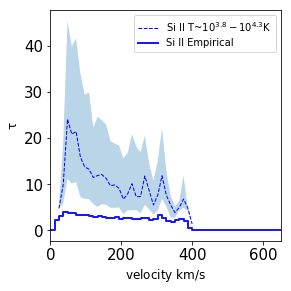

In [16]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0.15,0.15,0.8,0.8])
plt.fill_between(velocity,FQ_T_jks_SiII,TQ_T_jks_SiII,alpha=0.3)
plt.plot(velocity,median_T_jks_SiII,'--',linewidth=1,color='blue',label ='Si II T~$10^{3.8}-10^{4.3} K$')
plt.plot(velocity, Tau_0_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=2.0, color='blue',label ='Si II Empirical')
plt.legend(loc='upper right',fontsize=10)
ax.set_xlim(0,650,50)
ax.set_ylabel(r'$\tau$',fontsize=12)
ax.set_xlabel(r'velocity $km/s$',fontsize=12)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
#plt.savefig(dnameout+'Stats_Taus_SiII_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

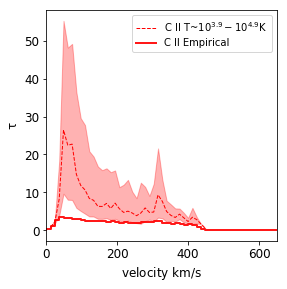

In [17]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0.15,0.15,0.8,0.8])
plt.fill_between(velocity,FQ_T_jks_CII,TQ_T_jks_CII,alpha=0.3,color='red')
plt.plot(velocity,median_T_jks_CII,'--',linewidth=1,color='red',label ='C II T~$10^{3.9}-10^{4.9} K$')
plt.plot(velocity, Tau_0_CII_dx,drawstyle='steps', alpha=0.90,linewidth=2.0, color='red',label ='C II Empirical')
ax.set_xlim(0,650,50)
plt.legend(loc='upper right',fontsize=10)
ax.set_ylabel(r'$\tau$',fontsize=12)
ax.set_xlabel(r'velocity $km/s$',fontsize=12)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
#plt.savefig(dnameout+'Stats_Taus_CII_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

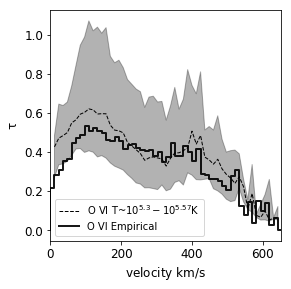

In [18]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0.15,0.15,0.8,0.8])
plt.fill_between(velocity,FQ_T_jks_OVI,TQ_T_jks_OVI,alpha=0.3,color='black')
plt.plot(velocity,median_T_jks_OVI,'--',linewidth=1,color='black',label ='O VI T~$10^{5.3}-10^{5.57} K$')
plt.plot(velocity, Tau_0_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=2.0, color='black',label='O VI Empirical')
plt.legend(loc='lower left',fontsize=10)
ax.set_xlim(0,650,50)
ax.set_ylabel(r'$\tau$',fontsize=12)
ax.set_xlabel(r'velocity $km/s$',fontsize=12)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
#plt.savefig(dnameout+'Stats_Taus_OVI_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

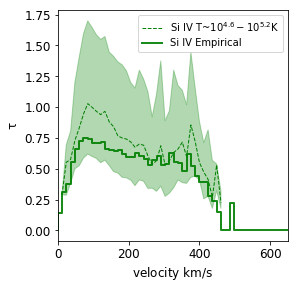

In [19]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0.15,0.15,0.8,0.8])
plt.fill_between(velocity,FQ_T_jks_SiIV,TQ_T_jks_SiIV,alpha=0.3,color='green')
plt.plot(velocity,median_T_jks_SiIV,'--',linewidth=1,color='green',label ='Si IV T~$10^{4.6}-10^{5.2} K$')
plt.plot(velocity, Tau_0_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=2.0, color='green', label='Si IV Empirical')
plt.legend(loc='upper right',fontsize=10)
ax.set_xlim(0,650,50)
ax.set_ylabel(r'$\tau$',fontsize=12)
ax.set_xlabel(r'velocity $km/s$',fontsize=12)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
#plt.savefig(dnameout+'Stats_Taus_SiIV_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

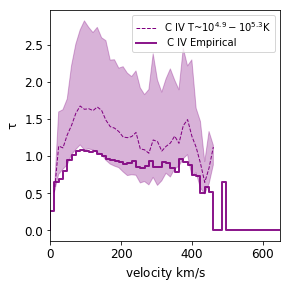

In [20]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0.15,0.15,0.8,0.8])
plt.fill_between(velocity,FQ_T_jks_CIV,TQ_T_jks_CIV,alpha=0.3,color='purple')
plt.plot(velocity,median_T_jks_CIV,'--',linewidth=1,color='purple',label ='C IV T~$10^{4.9}-10^{5.3} K$')
plt.plot(velocity, Tau_0_CIV_dx,drawstyle='steps', alpha=0.90,linewidth=2.0, color='purple',label=' C IV Empirical')
plt.legend(loc='upper right',fontsize=10)
ax.set_xlim(0,650,50)
ax.set_ylabel(r'$\tau$',fontsize=12)
ax.set_xlabel(r'velocity $km/s$',fontsize=12)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
#plt.savefig(dnameout+'Stats_Taus_CIV_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

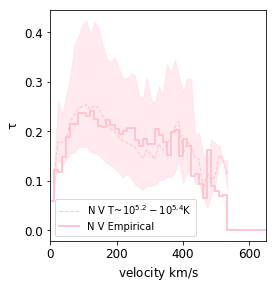

In [21]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0.2,0.15,0.75,0.8])
plt.fill_between(velocity,FQ_T_jks_NV,TQ_T_jks_NV,alpha=0.3,color='pink')
plt.plot(velocity,median_T_jks_NV,'--',linewidth=1,color='pink',label ='N V T~$10^{5.2}-10^{5.4} K$')
plt.plot(velocity, Tau_0_NV_dx,drawstyle='steps', alpha=0.90,linewidth=2.0, color='pink',label='N V Empirical')
plt.legend(loc='lower left',fontsize=10)
ax.set_xlim(0,650,50)
ax.set_ylabel(r'$\tau$',fontsize=12)
ax.set_xlabel(r'velocity $km/s$',fontsize=12)
#plt.savefig(dnameout+'Stats_Taus_NV_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()